# Class assignment

In [7]:
import numpy as np

X = np.linspace(0,1,50)
noise = np.array([np.random.normal(0,0.032) for i in range(50)])
Y = np.sin(1 + X**2) + noise

matrix = np.array([X,Y]).reshape(50,2)
columns = ['X','Y']

In [8]:
import pandas as pd
df = pd.DataFrame(matrix, columns = columns)
df

,X,Y
0,0.000000,0.020408
1,0.040816,0.061224
2,0.081633,0.102041
3,0.122449,0.142857
4,0.163265,0.183673
5,0.204082,0.224490
6,0.244898,0.265306
7,0.285714,0.306122
8,0.326531,0.346939
9,0.367347,0.387755


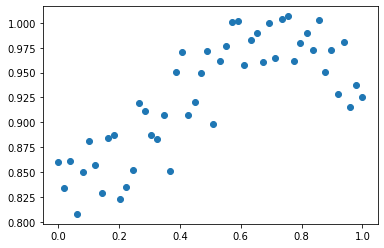

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

# Assignment 2

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'PlayTennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [11]:
df['outlook'].replace(['sunny', 'overcast', 'rainy'], [0,1,2], inplace = True)
df['temp'].replace(['hot','mild','cool'],[0,1,2], inplace = True)
df['humidity'].replace(['high','normal'],[0,1], inplace = True)
df['windy'].replace([False,True],[0,1], inplace = True) #unable to do because its a boolean value
df['play'].replace(['no','yes'],[0,1],inplace = True)

In [12]:
df

,outlook,temp,humidity,windy,play
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [6]:
Y = df['play']
X = df.drop(['play'], axis = 1)

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888

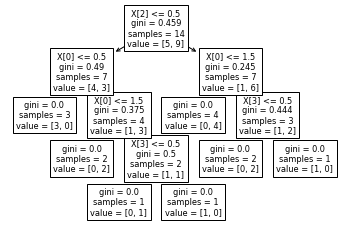

In [8]:
tree.plot_tree(clf)

In [13]:
clf_ig = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_ig.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples

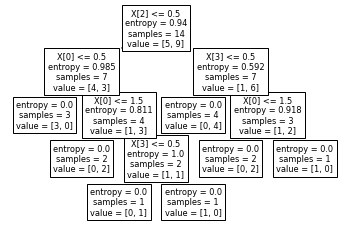

In [15]:
tree.plot_tree(clf_ig)

# Assignment 3 

In [1]:
d = {"blood_pressure" : ["High","High","High","High","Low","Low","Low","Low"], 
     "cholestrol" : ["High","Low","High","Low","High","Low","High","Low"],
     "blood_sugar" : ["High","medium","Low","High","medium","Low","High","medium"],
     "Target" : ["Yes","No","No","Yes","No","Yes","No","Yes"]}

import pandas as pd
df = pd.DataFrame(d)
df

,blood_pressure,cholestrol,blood_sugar,Target
0,High,High,High,Yes
1,High,Low,medium,No
2,High,High,Low,No
3,High,Low,High,Yes
4,Low,High,medium,No
5,Low,Low,Low,Yes
6,Low,High,High,No
7,Low,Low,medium,Yes


In [2]:
from sklearn import tree

df['blood_pressure'].replace(['High', 'Low'], [0,1], inplace = True)
df['cholestrol'].replace(['High', 'Low'], [0,1], inplace = True)
df['blood_sugar'].replace(['High', 'Low', 'medium'], [0,1,2], inplace = True)

X = df.loc[:, ['blood_pressure', 'cholestrol', 'blood_sugar']]
y = df['Target']

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3, 0.625, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'X[2] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

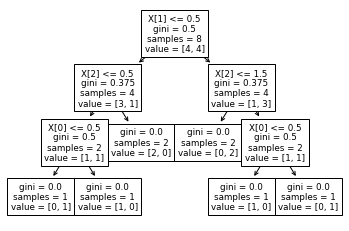

In [15]:
tree.plot_tree(clf)

In [ ]:
# basis vector may or may not be orthogonal
# multiply basis vector [B] with coordinate vector (points) [P]

'''

[[3,5],
 [7,9]]
 
one direction basis vector is [3,
                               7]
                               
another direction basis vector is [5,
                                   9]


[[a,b,c],
 [d,e,f],
 [g,h,i]]
 
here the basis vectors are [a,d,g], [b,e,h], [g,h,i]

'''

# B*P
# projection of vector A on vector B = B^T.A
# From total D attributes we select M attributes such M < D (with variance in M is high)

# LDA + KNN

In [11]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train_reshape = X_train.reshape(-1,784)

lda_5 = LDA(n_components=5)
X_5 = lda_5.fit_transform(X_train_reshape, y_train)

In [13]:
X_5.shape

(60000, 5)

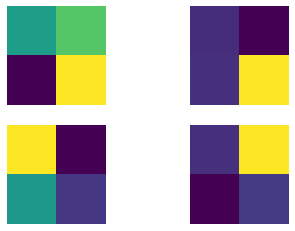

In [12]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_5[0][:4].reshape(2, 2))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_5[1][:4].reshape(2, 2))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_5[2][:4].reshape(2, 2))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_5[3][:4].reshape(2, 2))
ax[1, 1].set_axis_off()

plt.show()

In [14]:
X_test_reshape = X_test.reshape(-1, 784)
X_test_5 = lda_5.transform(X_test_reshape)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_5,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_3.score(X_5,y_train) # train accuracy

0.8927666666666667

In [17]:
knn_3.score(X_test_5,y_test)

0.8217